In [1]:
import pandas as pd
import spacy
#from spacy.lang.en.stop_words import STOP_WORDS
#import time
from spacytextblob.spacytextblob import SpacyTextBlob
import matplotlib.pyplot as plt

In [2]:
nlp = spacy.load("en_core_web_sm")

In [3]:
sds_text = pd.read_csv('../data/sds_text.csv')

In [4]:
sds_text

,episode_name,length_episode,context_episode,guest_name,guest_info,text_episode,episode_number,episode_date,episode_year,episode_day,host_episode,episode_split_text,speaker
0,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,"Sep 10, 2016",2016,Saturday,Kirill Eremenko,This is episode number one with ex-chemical en...,Kirill
1,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,"Sep 10, 2016",2016,Saturday,Kirill Eremenko,"Hey guys, welcome to the Podcast. I’ve got Rub...",Kirill
2,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,"Sep 10, 2016",2016,Saturday,Kirill Eremenko,Thank you! Thanks for having me over. I’m doin...,Ruben
3,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,"Sep 10, 2016",2016,Saturday,Kirill Eremenko,Awesome. It’s great to hear you and for those ...,Kirill
4,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,"Sep 10, 2016",2016,Saturday,Kirill Eremenko,"Yeah sure. So, I’m the senior manager of analy...",Ruben
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52607,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,"May 30, 2023",2023,Tuesday,Jon Krohn,"Yeah, right. Yeah, as I mean, it actually, it ...",Jon Krohn
52608,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,"May 30, 2023",2023,Tuesday,Jon Krohn,Happy to.,Matar Haller
52609,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,"May 30, 2023",2023,Tuesday,Jon Krohn,"Nice. Well, yeah, so you mentioned potentially...",Jon Krohn
52610,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,"May 30, 2023",2023,Tuesday,Jon Krohn,Thank you for having me. This was fascinating ...,Matar Haller


In [5]:
sds_text['guest_name'].value_counts()

 Hadelin de Ponteves       1013
 Ben Taylor                 691
 Samuel Hinton              609
 Sinan Ozdemir              608
 Rico Meinl                 564
                           ... 
 Clem Delangue               24
 SuperDataScience Team       24
 Kirill and Paulo            22
 Christina Maslach           21
 Orly Lobel                  15
Name: guest_name, Length: 333, dtype: int64

In [6]:
nlp.components

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7f8e20445c40>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7f8e20445580>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7f8e20437510>),
 ('senter', <spacy.pipeline.senter.SentenceRecognizer at 0x7f8e20445ac0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7f8e33db5cc0>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7f8e33e4bf40>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7f8e204373c0>)]

In [7]:
nlp.add_pipe("spacytextblob")

In [8]:
nlp.components

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7f8e20445c40>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7f8e20445580>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7f8e20437510>),
 ('senter', <spacy.pipeline.senter.SentenceRecognizer at 0x7f8e20445ac0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7f8e33db5cc0>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7f8e33e4bf40>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7f8e204373c0>),
 ('spacytextblob',
  <spacytextblob.spacytextblob.SpacyTextBlob at 0x7f8e451216a0>)]

In [ ]:
#sds_1 = sds_text[sds_text['episode_number'] == 1]

In [11]:
def sentiment_analysis(text):
    global sds_text
    
    if isinstance(text, float): # added this if statement because due to [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
        return 0.0  # Return neutral sentiment for float values
    doc = nlp(text)
    polarity = doc._.blob.polarity
    #subjectivity = doc._.subjectivity
    #assessment = doc._.assessment
    return polarity

In [12]:
sds_text['sentiments'] = sds_text['episode_split_text'].apply(sentiment_analysis)

In [13]:
sds_text

,episode_name,length_episode,context_episode,guest_name,guest_info,text_episode,episode_number,episode_date,episode_year,episode_day,host_episode,episode_split_text,speaker,sentiments
0,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,"Sep 10, 2016",2016,Saturday,Kirill Eremenko,This is episode number one with ex-chemical en...,Kirill,0.257792
1,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,"Sep 10, 2016",2016,Saturday,Kirill Eremenko,"Hey guys, welcome to the Podcast. I’ve got Rub...",Kirill,0.566667
2,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,"Sep 10, 2016",2016,Saturday,Kirill Eremenko,Thank you! Thanks for having me over. I’m doin...,Ruben,0.500000
3,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,"Sep 10, 2016",2016,Saturday,Kirill Eremenko,Awesome. It’s great to hear you and for those ...,Kirill,0.463636
4,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,"Sep 10, 2016",2016,Saturday,Kirill Eremenko,"Yeah sure. So, I’m the senior manager of analy...",Ruben,0.369388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52607,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,"May 30, 2023",2023,Tuesday,Jon Krohn,"Yeah, right. Yeah, as I mean, it actually, it ...",Jon Krohn,0.199031
52608,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,"May 30, 2023",2023,Tuesday,Jon Krohn,Happy to.,Matar Haller,0.800000
52609,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,"May 30, 2023",2023,Tuesday,Jon Krohn,"Nice. Well, yeah, so you mentioned potentially...",Jon Krohn,0.320000
52610,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,"May 30, 2023",2023,Tuesday,Jon Krohn,Thank you for having me. This was fascinating ...,Matar Haller,0.500000


In [15]:
sds_text.to_csv('../data/sds_sentiments.csv')

In [ ]:
sds_sentiments = pd.read_csv('../data/sds_sentiments.csv')

In [ ]:
sds_sentiments

In [17]:
sds_sentiments['guest_name'].value_counts()

 Hadelin de Ponteves       1013
 Ben Taylor                 691
 Samuel Hinton              609
 Sinan Ozdemir              608
 Rico Meinl                 564
                           ... 
 Clem Delangue               24
 SuperDataScience Team       24
 Kirill and Paulo            22
 Christina Maslach           21
 Orly Lobel                  15
Name: guest_name, Length: 333, dtype: int64

In [18]:
sds_sentiments['sentiments'].describe()

count    52612.000000
mean         0.191662
std          0.207417
min         -1.000000
25%          0.012500
50%          0.184310
75%          0.300000
max          1.000000
Name: sentiments, dtype: float64

In [ ]:
sds_sentiments[(sds_sentiments['guest_name'] == ' Kirill Eremenko ') & (sds_sentiments['host_episode'] == 'Kirill Eremenko')]

In [ ]:
sds_sentiments[(sds_sentiments['guest_name'] == ' Jaco Van Der Berg ')]

In [ ]:
print(x['episode_split_text'])

In [22]:
episode_sentiments = pd.DataFrame(sds_text.groupby(['episode_number', 'context_episode', 'episode_year', 'speaker'])['sentiments'].mean()).reset_index()

In [23]:
episode_sentiments

,episode_number,context_episode,episode_year,speaker,sentiments
0,1,Business Data Science Database,2016,Kirill,0.294579
1,1,Business Data Science Database,2016,Ruben,0.165573
2,2,Machine Learning Data Science,2016,Hadelin,0.240974
3,2,Machine Learning Data Science,2016,Kirill,0.270224
4,3,Machine Learning R Programming Data Science,2016,Kirill,0.204546
...,...,...,...,...,...
792,681,Machine Learning Data Science Python,2023,Matt Harrison,0.220748
793,682,Business Data Science,2023,Jon Krohn,0.141337
794,682,Business Data Science,2023,Mico Yuk,0.148660
795,683,Data Science Artificial Intelligence,2023,Jon Krohn,0.177678


In [36]:
episode_sentiments['speaker'].unique()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [37]:
episode_sentiments[(episode_sentiments['speaker'] == 'Kirill') | (episode_sentiments['speaker'] == 'Kirill Eremenko') | (episode_sentiments['speaker'] == 'Jon Krohn')]

,episode_number,context_episode,episode_year,speaker,sentiments
0,1,Business Data Science Database,2016,Kirill,0.294579
3,2,Machine Learning Data Science,2016,Kirill,0.270224
4,3,Machine Learning R Programming Data Science,2016,Kirill,0.204546
7,4,Business Data Science,2016,Kirill,0.218027
9,5,Data Science,2016,Kirill,0.174029
...,...,...,...,...,...
788,679,Business Data Science Artificial Intelligence,2023,Jon Krohn,0.248596
790,680,Business Data Science,2023,Jon Krohn,0.203464
791,681,Machine Learning Data Science Python,2023,Jon Krohn,0.244255
793,682,Business Data Science,2023,Jon Krohn,0.141337


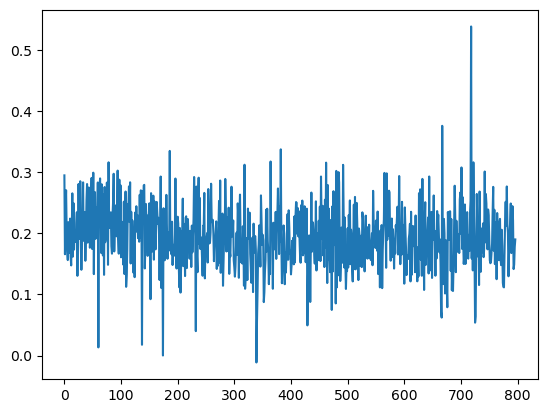

In [24]:
episode_sentiments['sentiments'].plot();

In [25]:
episode_sentiments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   episode_number   797 non-null    int64  
 1   context_episode  797 non-null    object 
 2   episode_year     797 non-null    int64  
 3   speaker          797 non-null    object 
 4   sentiments       797 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 31.3+ KB


In [ ]:
episode_sentiments[episode_sentiments['context_episode'] == 'Data Science Artificial Intelligence']

In [ ]:
episode['']

In [ ]:
sentiments

In [ ]:
sentiments['context_episode'].unique()

In [ ]:
sentiments[sentiments['context_episode'] == 'Data Science Artificial Intelligence']

In [ ]:
sds_text[sds_text['sentiments'] < 0]

In [ ]:
sds_1['sentiments'] = sds_1['episode_split_text'].apply(sentiment_analysis)

In [ ]:
sds_1

In [ ]:
sds_1['sentiment_polarity'] = None
sds_1['sentiment_subjectivity'] = None
sds_1['sentiment_assessment'] = None

In [ ]:
sds_1

In [ ]:
def sentiment_analysis(text):
    global sds_1  # Assuming `sds_1` is a global variable or defined outside the function
    
    doc = nlp(text)  # Process the text string
    
    polarity = doc._.polarity  # Access the polarity from the processed document
    subjectivity = doc._.subjectivity  # Access the subjectivity from the processed document
    assessment = doc._.assessments  # Access the sentiment assessments from the processed document
    
    sds_1['sentiment_polarity'] = polarity
    sds_1['sentiment_subjectivity'] = subjectivity
    sds_1['sentiment_assessment'] = assessment

In [ ]:
sds_text['sentiment_polarity'] = None
sds_text['sentiment_subjectivity'] = None
sds_text['sentiment_assessment'] = None

In [ ]:
from spacy.tokens import Doc

def set_sentiment_assessments(doc, assessments):
    doc._.set("sentiment_assessments", assessments)

# Register the extension attribute
Doc.set_extension("sentiment_assessments", default=None)

In [ ]:
sentiment_analysis(sds_text['episode_split_text'])

In [ ]:
ds_1['sentiments'] = ds_1['episode_split_text'].apply(sentiment_analysis)